In [3]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')


Mounted at /content/drive


In [4]:
import os
from PIL import Image

In [5]:
Training_original="/content/drive/MyDrive/DEEPFAKE AUDIO/k47yd3m28w-4/Training_original/Training_original/Training_original"
Training_Fake="/content/drive/MyDrive/DEEPFAKE AUDIO/k47yd3m28w-4/Training_original/Training_original/Training_original"
Validation_original="/content/drive/MyDrive/DEEPFAKE AUDIO/k47yd3m28w-4/Validation_original/Validation_original/Validation_original"
Validation_Fake="/content/drive/MyDrive/DEEPFAKE AUDIO/k47yd3m28w-4/Validation_fake/Validation_fake/Validation_fake"

In [6]:
images_original = []
images_fake = []

In [7]:


# Loop through all files in the folder
for filename in os.listdir(Training_original):
    if filename.endswith((".jpg")):  # Check for common image extensions
        # Open the image file
        image_path = os.path.join(Training_original, filename)
        img = Image.open(image_path)
        images_original.append(img)

# Output the number of images loaded
print(f"Total number of Training original images loaded: {len(images_original)}")


# Loop through all files in the folder
for filename in os.listdir(Training_Fake):
    if filename.endswith((".jpg")):  # Check for common image extensions
        # Open the image file
        image_path = os.path.join(Training_Fake, filename)
        img = Image.open(image_path)
        images_fake.append(img)

# Output the number of images loaded
print(f"Total number of Training fake images loaded: {len(images_fake)}")

Total number of Training original images loaded: 2036
Total number of Training fake images loaded: 2036


In [8]:
import numpy as np
from sklearn.utils import shuffle

# Resizing the image size
def preprocess_image(image, target_size=(128, 128)):
    # Resize and convert to numpy array
    return np.array(image.resize(target_size)) / 255.0  # Normalize pixel values

In [9]:
# Preprocess images to reduce memory usage
images_original = [preprocess_image(img) for img in images_original]
images_fake = [preprocess_image(img) for img in images_fake]

# Label the data
real_labels = [0] * len(images_original)  # Label 0 for original images
fake_labels = [1] * len(images_fake)  # Label 1 for fake images

# Convert the lists directly to numpy arrays for more efficient memory management
images = np.array(images_original + images_fake, dtype=np.float32)
labels = np.array(real_labels + fake_labels, dtype=np.int32)

# Shuffle the combined dataset
images, labels = shuffle(images, labels, random_state=42)



In [10]:
val_original=[]
val_fake=[]

In [11]:
# Loop through all files in the folder
for filename in os.listdir(Validation_original):
    if filename.endswith((".jpg")):  # Check for common image extensions
        # Open the image file
        image_path = os.path.join(Validation_original, filename)
        img = Image.open(image_path)
        val_original.append(img)

# Output the number of images loaded
print(f"Total number of Validation original images loaded: {len(val_original)}")


# Loop through all files in the folder
for filename in os.listdir(Validation_Fake):
    if filename.endswith((".jpg")):  # Check for common image extensions
        # Open the image file
        image_path = os.path.join(Validation_Fake, filename)
        img = Image.open(image_path)
        val_fake.append(img)

# Output the number of images loaded
print(f"Total number of Validation fake images loaded: {len(val_fake)}")

Total number of Validation original images loaded: 870
Total number of Validation fake images loaded: 864


In [12]:

# Preprocess images to reduce memory usage
val_original = [preprocess_image(img) for img in val_original]
val_fake = [preprocess_image(img) for img in val_fake]

# Label the data
Val_real_labels = [0] * len(val_original)  # Label 0 for original images
Val_fake_labels = [1] * len(val_fake)  # Label 1 for fake images

# Convert the lists directly to numpy arrays for more efficient memory management
Val_images = np.array(val_original + val_fake, dtype=np.float32)
Val_labels = np.array(Val_real_labels + Val_fake_labels, dtype=np.int32)

# Shuffle the combined dataset
Val_images, Val_labels = shuffle(Val_images, Val_labels, random_state=42)



In [ ]:
import matplotlib.pyplot as plt

def visualize_images(images, labels, num_images=10):
    """
    Visualize a specified number of images with their labels.

    Parameters:
    images (list): A list of images (arrays).
    labels (list or np.array): A list or array of labels corresponding to the images.
    num_images (int): The number of images to display.
    """
    # Ensure we don't exceed the number of images available
    num_images = min(num_images, len(images))

    # Set up the figure for plotting
    plt.figure(figsize=(15, 5))

    for i in range(num_images):
        plt.subplot(2, 5, i + 1)  # Create a 2-row grid with 5 columns
        plt.imshow(images[i])
        plt.title(str(labels[i]))  # Convert label to string to avoid ambiguity
        plt.axis('off')  # Hide axes

    plt.tight_layout()  # Adjust spacing
    plt.show()

# Example usage:
# Assuming 'image_list' is your list of image arrays and 'label_list' is your list of labels
# visualize_images(image_list, label_list)


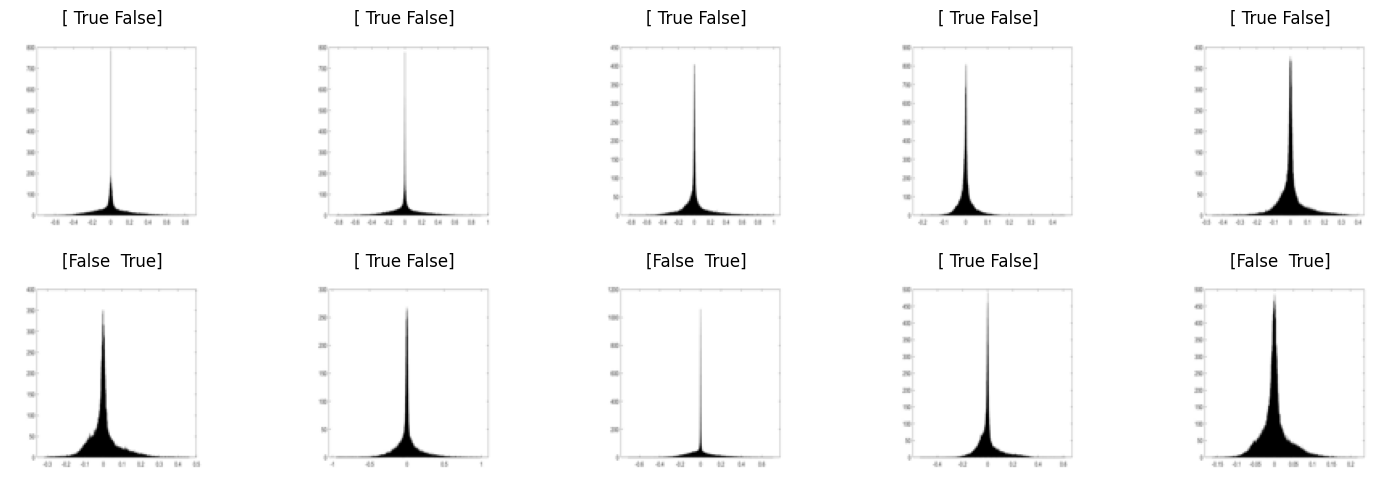

In [ ]:
visualize_images(images, labels==1, num_images=10)

In [14]:
len(real_labels)
len(fake_labels)

2036

In [ ]:
len(real_labels)

In [12]:
len(images)

4072

In [13]:
len(labels)

4072

In [13]:
images[0].size

49152

In [14]:
Val_images[0].size

49152

In [15]:
Val_images.shape

(1734, 128, 128, 3)

In [16]:
images.shape

(4072, 128, 128, 3)

In [15]:
import tensorflow as tf
from tensorflow.keras import layers, models

def create_deepfake_detection_model(input_shape, num_classes=1):
    inputs = layers.Input(shape=input_shape)

    # First CNN Block
    x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(inputs)
    x = layers.MaxPooling2D((2, 2))(x)

    # ResNet Blocks
    for _ in range(12):  # 12 blocks in ResNet
        res = x
        x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
        x = layers.Conv2D(32, (3, 3), padding='same')(x)
        x = layers.add([x, res])  # Residual connection
        x = layers.ReLU()(x)
        x = layers.MaxPooling2D((2, 2))(x)

    # Second CNN Block
    x = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = layers.MaxPooling2D((2, 2))(x)

    # Transformer Encoder (Two-layer)
    x = layers.Flatten()(x)
    x = layers.Dense(256, activation='relu')(x)
    x = layers.Dense(256, activation='relu')(x)  # Second transformer layer

    # LSTM Layer (Bidirectional)
    x = layers.Reshape((-1, 256))(x)  # Reshape for LSTM input
    x = layers.Bidirectional(layers.LSTM(128, return_sequences=True))(x)

    # Classification Layer
    x = layers.Flatten()(x)
    classification_output = layers.Dense(num_classes, activation='sigmoid', name='classification_output')(x)

    # Clip-level Identification Layer
    clip_identification_output = layers.Dense(1, activation='sigmoid', name='clip_identification_output')(x)

    # Create the model
    model = models.Model(inputs=inputs, outputs=[classification_output, clip_identification_output])

    return model


In [16]:
import tensorflow as tf
from tensorflow.keras import layers, models

def create_deepfake_detection_model(input_shape, num_classes=1):
    inputs = layers.Input(shape=input_shape)

    # First CNN Block
    x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(inputs)
    x = layers.MaxPooling2D((2, 2))(x)

    # ResNet Blocks
    for _ in range(12):  # 12 blocks in ResNet
        res = x
        x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
        x = layers.Conv2D(32, (3, 3), padding='same')(x)
        x = layers.add([x, res])  # Residual connection
        x = layers.ReLU()(x)
        # Apply MaxPooling2D conditionally to prevent negative dimensions
        # Check if the spatial dimensions are greater than 1 before applying MaxPooling2D
        if x.shape[1] > 1 and x.shape[2] > 1:
            x = layers.MaxPooling2D((2, 2))(x)

    # Second CNN Block
    x = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    # Apply MaxPooling2D conditionally to prevent negative dimensions
    # Check if the spatial dimensions are greater than 1 before applying MaxPooling2D
    if x.shape[1] > 1 and x.shape[2] > 1:
        x = layers.MaxPooling2D((2, 2))(x)

    # Transformer Encoder (Two-layer)
    x = layers.Flatten()(x)
    x = layers.Dense(256, activation='relu')(x)
    x = layers.Dense(256, activation='relu')(x)  # Second transformer layer

    # LSTM Layer (Bidirectional)
    x = layers.Reshape((-1, 256))(x)  # Reshape for LSTM input
    x = layers.Bidirectional(layers.LSTM(128, return_sequences=True))(x)

    # Classification Layer
    x = layers.Flatten()(x)
    classification_output = layers.Dense(num_classes, activation='sigmoid', name='classification_output')(x)

    # Clip-level Identification Layer
    clip_identification_output = layers.Dense(1, activation='sigmoid', name='clip_identification_output')(x)

    # Create the model
    model = models.Model(inputs=inputs, outputs=[classification_output, clip_identification_output])

    return model

In [20]:
# Define the input shape, assuming a spectrogram of 128x128 with 3 channels
input_shape = (128, 128, 3)  # Example shape; adjust as needed

# Create the model
model = create_deepfake_detection_model(input_shape)
model.compile(optimizer='adam',
              loss={'classification_output': 'binary_crossentropy',
                    'clip_identification_output': 'binary_crossentropy'},
              metrics={'classification_output': 'accuracy',  # Metric for the first output
                        'clip_identification_output': 'accuracy'})  # Metric for the second output

# Model Summary
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1             │ (None, 128, 128, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_26 (Conv2D)        │ (None, 128, 128, 32)   │            896 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_7           │ (None, 64, 64, 32)     │              0 │ conv2d_26[0][0]        │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_27 (Conv2D)        │ (None, 64, 64, 32)     │          9,248 │ max_pooling2d_7[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_28 (Conv2D)        │ (None, 64, 64, 32)     │          9,248 │ conv2d_27[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_12 (Add)              │ (None, 64, 64, 32)     │              0 │ conv2d_28[0][0],       │
│                           │                        │                │ max_pooling2d_7[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ re_lu_12 (ReLU)           │ (None, 64, 64, 32)     │              0 │ add_12[0][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_8           │ (None, 32, 32, 32)     │              0 │ re_lu_12[0][0]         │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_29 (Conv2D)        │ (None, 32, 32, 32)     │          9,248 │ max_pooling2d_8[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_30 (Conv2D)        │ (None, 32, 32, 32)     │          9,248 │ conv2d_29[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_13 (Add)              │ (None, 32, 32, 32)     │              0 │ conv2d_30[0][0],       │
│                           │                        │                │ max_pooling2d_8[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ re_lu_13 (ReLU)           │ (None, 32, 32, 32)     │              0 │ add_13[0][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_9           │ (None, 16, 16, 32)     │              0 │ re_lu_13[0][0]         │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_31 (Conv2D)        │ (None, 16, 16, 32)     │          9,248 │ max_pooling2d_9[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_32 (Conv2D)        │ (None, 16, 16, 32)     │          9,248 │ conv2d_31[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_14 (Add)              │ (None, 16, 16, 32)     │              0 │ conv2d_32[0][0],       │
│                           │                        │                │ max_pooling2d_9[0][0]  │
├──────────────────────

 Total params: 753,410 (2.87 MB)

 Trainable params: 753,410 (2.87 MB)

 Non-trainable params: 0 (0.00 B)

In [21]:
# Train the model
history = model.fit(
    images,
    {'classification_output': labels,  # Use the entire labels array for classification
     'clip_identification_output': labels},  # Use the same labels for clip identification
    validation_data=(Val_images,
                     {'classification_output': Val_labels,  # Validation labels for classification
                      'clip_identification_output': Val_labels}),  # Validation labels for clip identification
    epochs=40,
    batch_size=32
)

Epoch 1/40
128/128 ━━━━━━━━━━━━━━━━━━━━ 23s 68ms/step - classification_output_accuracy: 0.5068 - clip_identification_output_accuracy: 0.5139 - loss: 1.3871 - val_classification_output_accuracy: 0.4983 - val_clip_identification_output_accuracy: 0.4983 - val_loss: 1.3863
Epoch 2/40
128/128 ━━━━━━━━━━━━━━━━━━━━ 6s 45ms/step - classification_output_accuracy: 0.4896 - clip_identification_output_accuracy: 0.4886 - loss: 1.3866 - val_classification_output_accuracy: 0.4983 - val_clip_identification_output_accuracy: 0.4983 - val_loss: 1.3869
Epoch 3/40
128/128 ━━━━━━━━━━━━━━━━━━━━ 6s 47ms/step - classification_output_accuracy: 0.5084 - clip_identification_output_accuracy: 0.5082 - loss: 1.3875 - val_classification_output_accuracy: 0.5017 - val_clip_identification_output_accuracy: 0.5017 - val_loss: 1.3863
Epoch 4/40
128/128 ━━━━━━━━━━━━━━━━━━━━ 9s 37ms/step - classification_output_accuracy: 0.4976 - clip_identification_output_accuracy: 0.4966 - loss: 1.3866 - val_classification_output_accuracy:

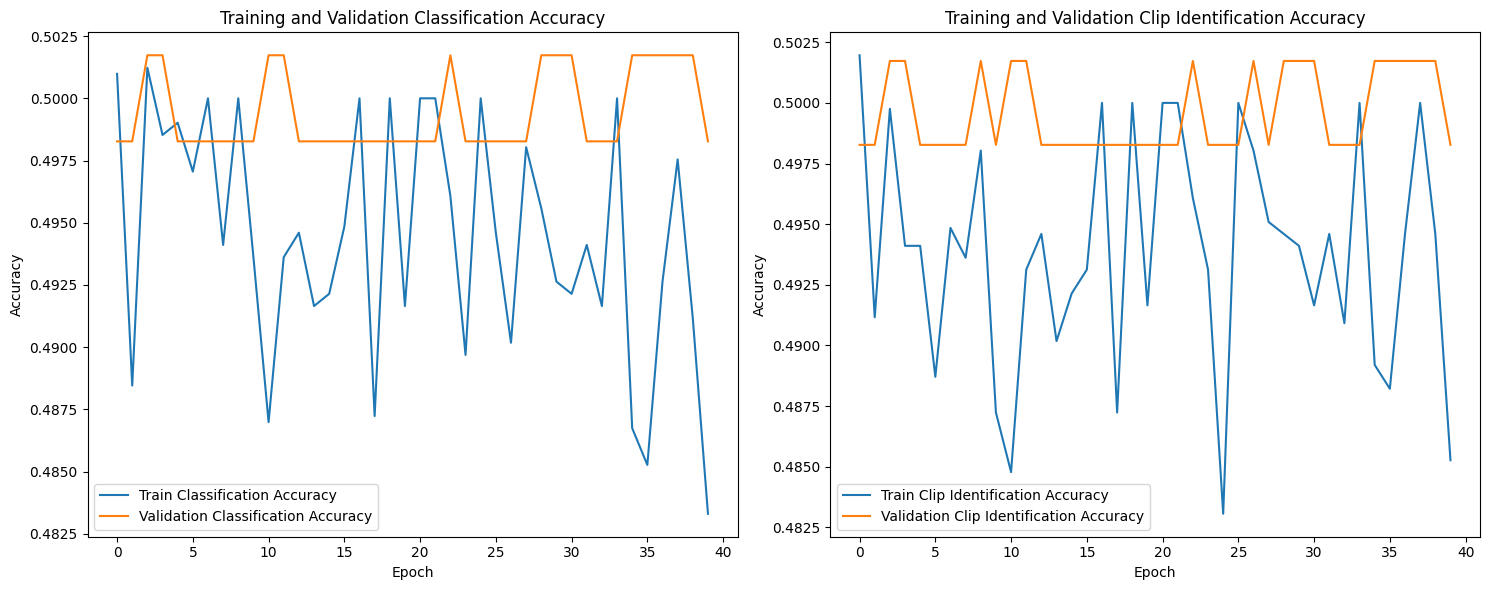

In [23]:
import matplotlib.pyplot as plt

# Assuming your history contains keys for both outputs
plt.figure(figsize=(15, 6))

# Plotting training & validation accuracy for classification output
plt.subplot(1, 2, 1)
plt.plot(history.history['classification_output_accuracy'], label='Train Classification Accuracy')
plt.plot(history.history['val_classification_output_accuracy'], label='Validation Classification Accuracy')
plt.title('Training and Validation Classification Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plotting training & validation accuracy for clip identification output
plt.subplot(1, 2, 2)
plt.plot(history.history['clip_identification_output_accuracy'], label='Train Clip Identification Accuracy')
plt.plot(history.history['val_clip_identification_output_accuracy'], label='Validation Clip Identification Accuracy')
plt.title('Training and Validation Clip Identification Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

